## Customer Churn occurs when subscribers or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service.

## Predicting which customers are likely to leave the bank in the future can have both tangible and intangible effect on the organization.

## Machine learning algorithms can be used to predict churn for bank customers.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [141]:
df=pd.read_csv("Customer Churn Bank .csv")

In [142]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data has zero null values

In [144]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [145]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# EDA

## Target Variable
#### 1 Stands for Exit
#### 0 Stands for Non Exit

0    7963
1    2037
Name: Exited, dtype: int64


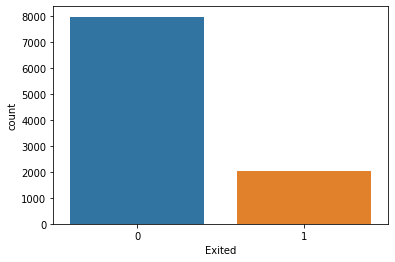

In [146]:
sns.countplot(df.Exited)
print(df.Exited.value_counts())

## Single Variate Analysis

Gender Count

Male      5457
Female    4543
Name: Gender, dtype: int64


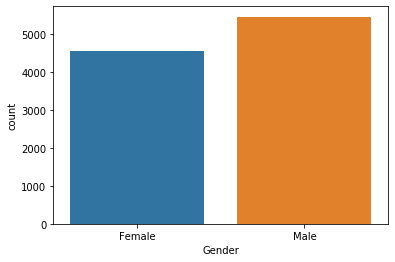

In [147]:
sns.countplot(df.Gender)
print(df.Gender.value_counts())

Has a credit card or not

1    7055
0    2945
Name: HasCrCard, dtype: int64


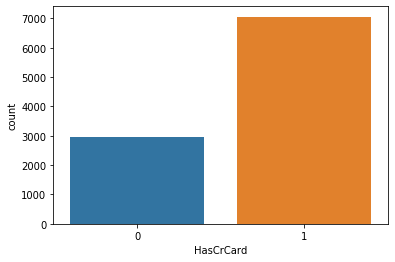

In [148]:
sns.countplot(df.HasCrCard)
print(df.HasCrCard.value_counts())

Active Member of bank or not

1    5151
0    4849
Name: IsActiveMember, dtype: int64


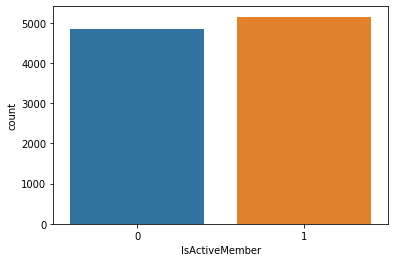

In [149]:
sns.countplot(df.IsActiveMember)
print(df.IsActiveMember.value_counts())

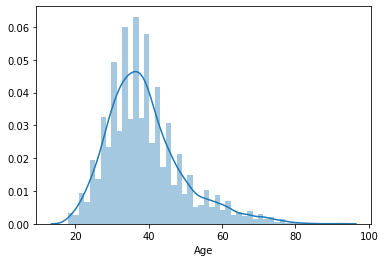

In [150]:
sns.distplot(df.Age)

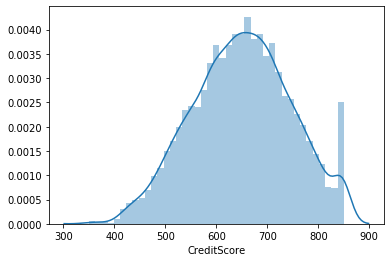

In [151]:
sns.distplot(df.CreditScore)

Tenure count

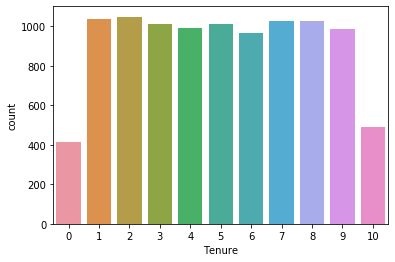

In [152]:
sns.countplot(df.Tenure)

Number of products 

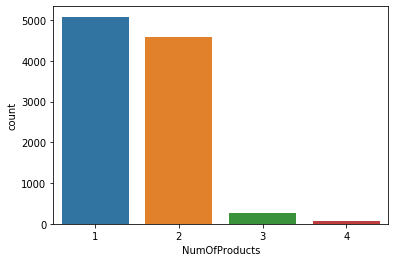

In [153]:
sns.countplot(df.NumOfProducts)

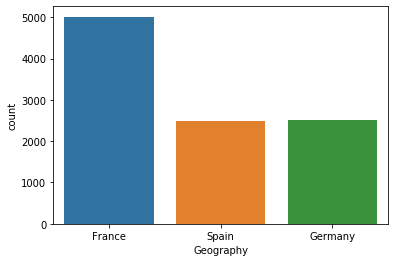

In [154]:
sns.countplot(df.Geography)

## BI Variate Analysis

Gender count VS Churned

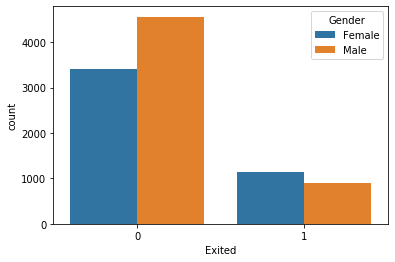

In [155]:
sns.countplot(x = 'Exited', hue = 'Gender', data = df)
plt.show()

Area VS Churned

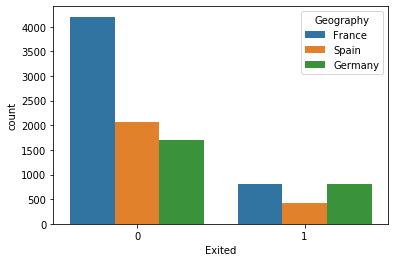

In [156]:
sns.countplot(x = 'Exited', hue = 'Geography', data = df)
plt.show()

Age VS Churned

<function matplotlib.pyplot.show(*args, **kw)>

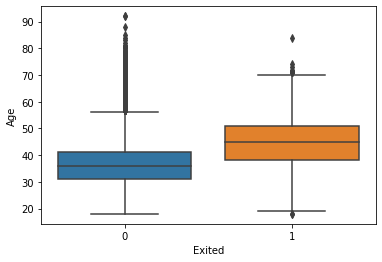

In [157]:
sns.boxplot( y = df.Age,  x = df.Exited)
plt.show

Credit score VS Churned

<function matplotlib.pyplot.show(*args, **kw)>

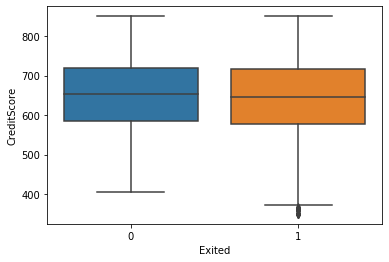

In [158]:
sns.boxplot( y = df.CreditScore,  x = df.Exited)
plt.show

Tenure VS Churned

<function matplotlib.pyplot.show(*args, **kw)>

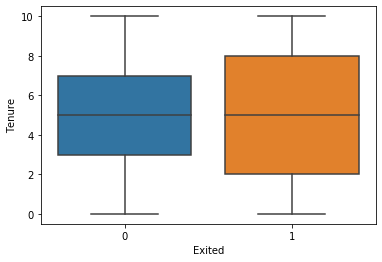

In [159]:
sns.boxplot( y = df.Tenure,  x = df.Exited)
plt.show

Number of products VS Churned

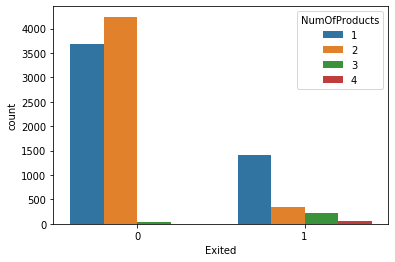

In [160]:
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = df)
plt.show()

Active Member VS Churned

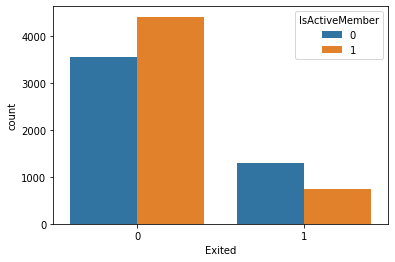

In [161]:
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = df)
plt.show()

### Correlation Matrix

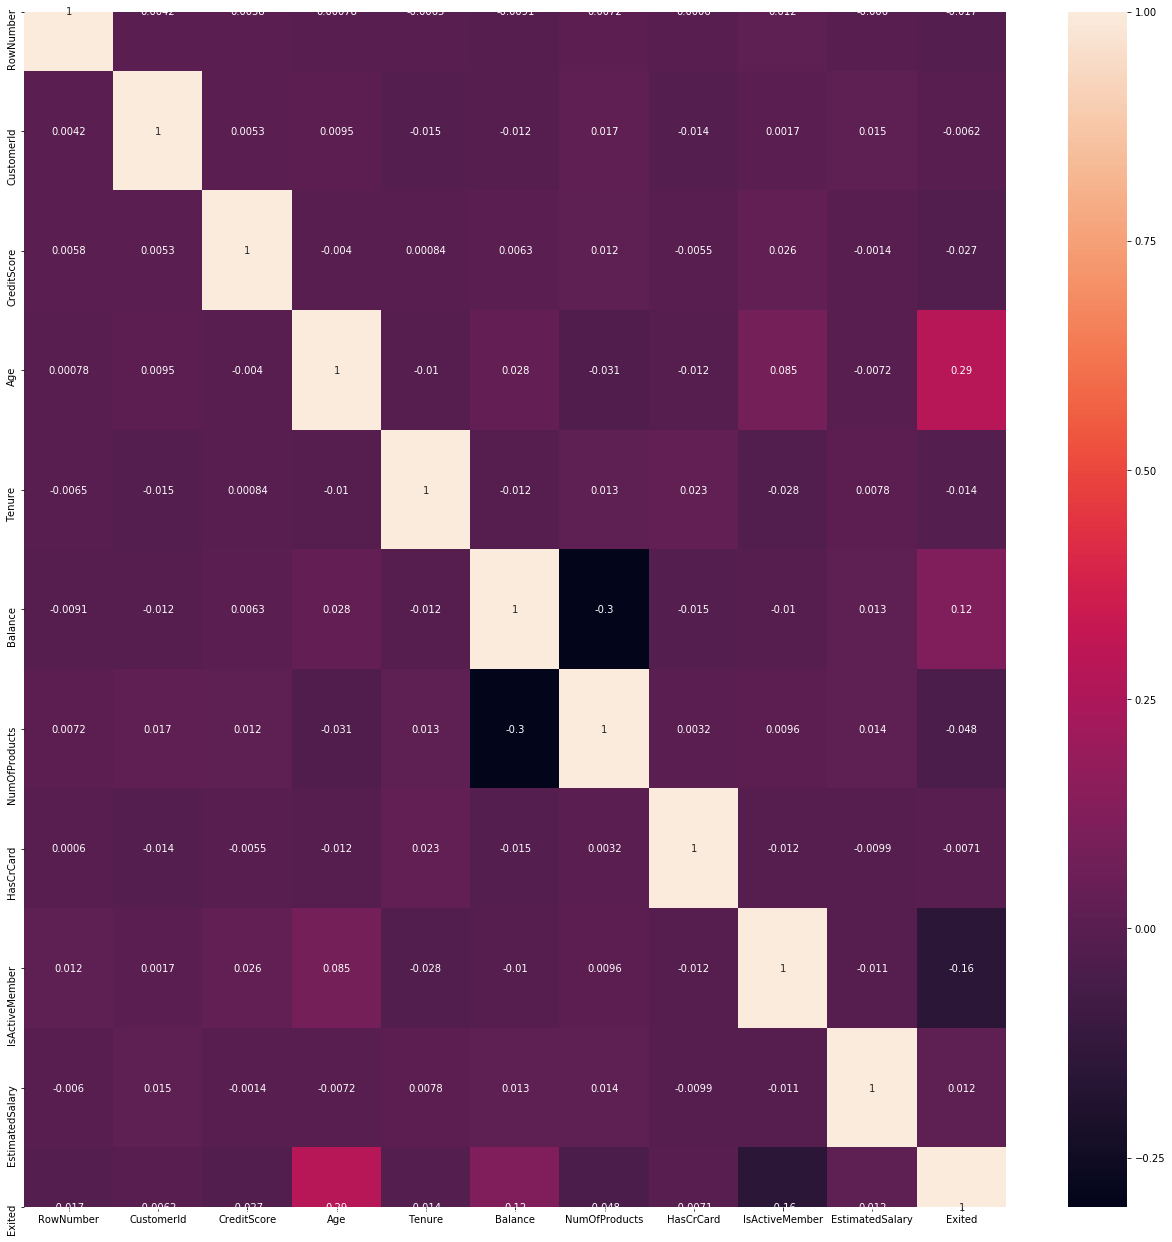

In [162]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

## Encoding the Categorical Data

In [163]:
Geography = pd.get_dummies(df.Geography, drop_first = True)
Gender = pd.get_dummies(df.Gender, drop_first = True)
df = pd.concat([df, Geography, Gender], axis = 1)

In [164]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Spliting into Training and Testing Data

In [165]:
X=df.drop(['RowNumber', 'CustomerId', 'Surname', "Geography","Gender",'Exited'],axis=1)
y=(df["Exited"])

In [166]:
y = y.values.reshape(len(y),1)
print(X.shape, y.shape)

(10000, 11) (10000, 1)


### Balancing the Target Variable

In [168]:
count_no_churn = (y == 0).sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (y==1).sum()
print("Number of customers who churnes:",count_yes_churn)
pct_of_no_churn = count_no_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who didn't churn:", pct_of_no_churn*100)
pct_of_yes_churn = count_yes_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who churned:", pct_of_yes_churn*100)

Number of customers who didn't churn: 7963
Number of customers who churnes: 2037
percentage of customers who didn't churn: 79.63
percentage of customers who churned: 20.369999999999997


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [29]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

### Using SMOTE we can oversample the Target variable 

In [173]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (12736, 11)
After OverSampling, the shape of train_y: (12736,) 

After OverSampling, counts of label '1': 6368
After OverSampling, counts of label '0': 6368


In [174]:
X_train_res=X_train
y_train_res=y_train

## Feature Importance

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[0.11930139 0.23643762 0.1029799  0.12880233 0.14288907 0.0313491
 0.04445404 0.12021429 0.02892388 0.02163664 0.02301173]


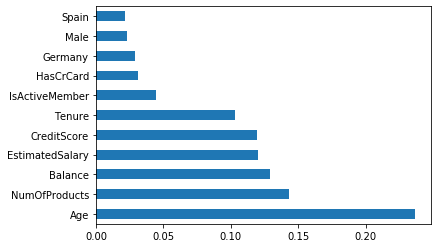

In [32]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

# Model Building

### Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [176]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [177]:
predictions = model.predict(X_train)

In [178]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 78.99%


In [179]:
pred = model.predict(X_test)

In [180]:
accuracy_score(y_test,pred)

0.789

#### Confusion matrix and Precision Recall Report

In [181]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[1553   42]
 [ 380   25]]


In [182]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



Using Logistic Regression accuracy, on training data is 78.99%  and accuracy on testing data is 78.9%

But confusion matrix is not looking promising for Logistic Regression

### Gaussian Naive Bayes

In [183]:
from sklearn.naive_bayes import GaussianNB

In [184]:
model = GaussianNB() 
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [185]:
predictions = model.predict(X_train)

In [186]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 78.56%


In [187]:
pred = model.predict(X_test)


In [188]:
accuracy_score(y_test,pred)

0.785

#### Confusion matrix and Precision Recall Report

In [189]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[1535   60]
 [ 370   35]]


In [190]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1595
           1       0.37      0.09      0.14       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.51      2000
weighted avg       0.72      0.79      0.73      2000



Using Gaussian Naive Bayes, accuracy on training data is 78.56% and accuracy on testing data is 78.5%

But the report of Guassian Naive bayes is not looking promising

### KNN Classifier

In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,50)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

{'n_neighbors': 36}

In [269]:
model = KNeighborsClassifier(n_neighbors=36)
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(n_neighbors=36)

In [270]:
predictions = model.predict(X_train)

In [271]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 79.61%


In [272]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7965

#### Confusion Matix and Precison Recall Report 

In [273]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[1593    2]
 [ 405    0]]


In [274]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



Using KNN ,accuracy on training data is 79.61% and accuracy on testing data is 79.65%

But confusion matrix for KNN is looking imbalanced hence KNN can't be used for predictions

### Decision Tree

In [275]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [276]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [277]:
predictions = model.predict(X_train)

In [278]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 100.00%


In [279]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.796

Accuracy of training data is very high as compared to testing data ,hence its a case of overfitting

In [280]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth': [3,5,7,20, 30]}

gs_inst = GridSearchCV(model,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20, 30]})

In [281]:
gs_inst.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [282]:
model = DecisionTreeClassifier(criterion='entropy',max_depth= 7)
model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [283]:
predictions = model.predict(X_train)

In [284]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 87.04%


In [285]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8545

#### Confusion Matrix and Precison Recall report

In [209]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[1495  100]
 [ 192  213]]


In [286]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.68      0.53      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.85      0.85      2000



Using Decision Tree,accuracy on training data is 87.02% and accuracy on testing data is 85.35%

### Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [289]:
predictions = model.predict(X_train)

In [290]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 100.00%


In [291]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8655

Hence a clear case of overfittng

#### Hyper-parameter Tuning

In [292]:
from sklearn.model_selection import RandomizedSearchCV

In [300]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [301]:

#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [302]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.0min finished
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [303]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 44,
 'bootstrap': True}

In [304]:
model = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 44,
 'bootstrap': True})

In [305]:
model.fit(X_train, y_train)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=44, min_samples_split=10, n_estimators=600)

In [306]:
predictions = model.predict(X_train)

In [307]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 93.10%


In [308]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8685

#### Confusion Matrix and Precison Recall report

In [309]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[1495  100]
 [ 191  214]]


In [310]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.68      0.53      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.85      0.85      2000



#### Random forest is giving a good result on Training and testing data  

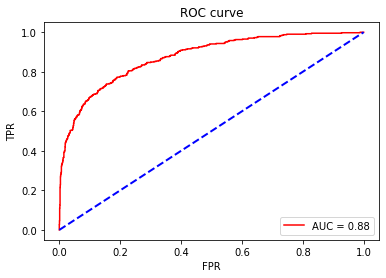

In [226]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [311]:
#Area under the Roc Curve 
roc_auc_score(y_test, preds)

0.8674902279499982

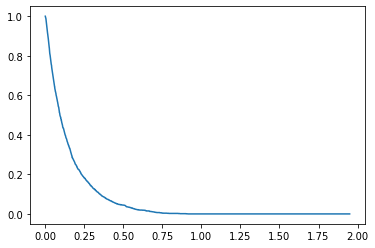

In [228]:
plt.plot(threshold,fpr)

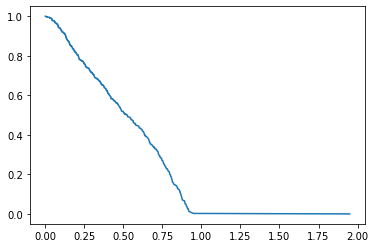

In [229]:
plt.plot(threshold,tpr)

#### Optimal Value of Thresold

In [230]:
from sklearn.metrics import precision_recall_curve
probs = model.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

(0, 1)

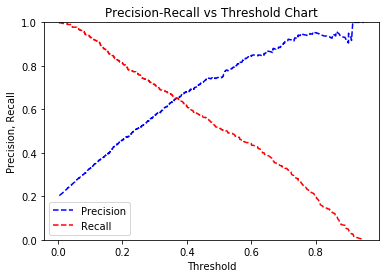

In [231]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 

##### From the Graph we can conclude the 0.4 as our optimum value of thresold

In [323]:
threshold = 0.4
pred = np.where(model.predict_proba(X_test)[:,1] >= threshold, 1, 0)

In [324]:
con_mat2 = confusion_matrix(y_test, pred )
print(con_mat2)

[[1479  116]
 [ 160  245]]


In [325]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1595
           1       0.68      0.60      0.64       405

    accuracy                           0.86      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000



Using Random Forest ,accuracy on training data is 93.16% and accuracy on testing data is 86.75%

### Gradient Boosting

In [326]:
from sklearn.ensemble import GradientBoostingClassifier


In [327]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_features' : ['log2',0.5,1.0],
              'max_depth' : [2,3,6],
              'min_samples_leaf' : [1,2,3,10],
              'n_estimators': [100,300,500,1000,1200],
              'learning_rate' : [0.1,0.2,0.3,1],
              'loss' : ['deviance']
             }

In [328]:
pre_gbc_model = RandomizedSearchCV(GradientBoostingClassifier(warm_start=True), 
                   param_distributions = param_dist,
                   cv=3, n_iter = 10, n_jobs=-1)

In [329]:
pre_gbc_model.fit(X_train, y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(warm_start=True),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 1],
                                        'loss': ['deviance'],
                                        'max_depth': [2, 3, 6],
                                        'max_features': ['log2', 0.5, 1.0],
                                        'min_samples_leaf': [1, 2, 3, 10],
                                        'n_estimators': [100, 300, 500, 1000,
                                                         1200]})

In [330]:
pre_gbc_model.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 6,
 'loss': 'deviance',
 'learning_rate': 0.1}

In [331]:
model= GradientBoostingClassifier(**
{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 6,
 'loss': 'deviance',
 'learning_rate': 0.1})

In [332]:
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(max_depth=6, max_features='log2', min_samples_leaf=2)

In [333]:
predictions = model.predict(X_train)

In [334]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 91.10%


In [335]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.87

In [336]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[1479  116]
 [ 160  245]]


In [337]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1595
           1       0.68      0.60      0.64       405

    accuracy                           0.86      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000



#### ROC Graph for Gradient Boosting

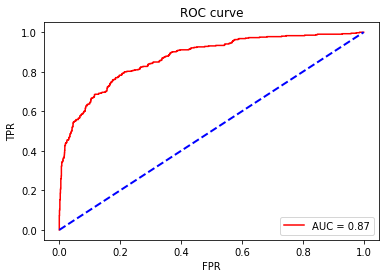

In [338]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [339]:
#AUC of ROC 
roc_auc_score(y_test, preds)

0.8706157359030922

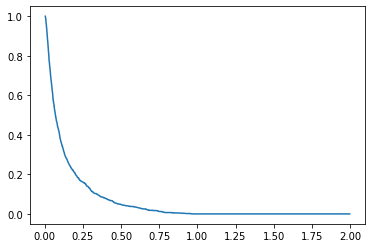

In [340]:
plt.plot(threshold,fpr)

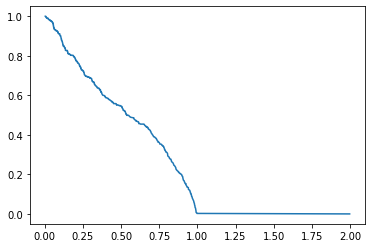

In [341]:
plt.plot(threshold,tpr)

In [342]:
from sklearn.metrics import precision_recall_curve
probs = model.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

(0, 1)

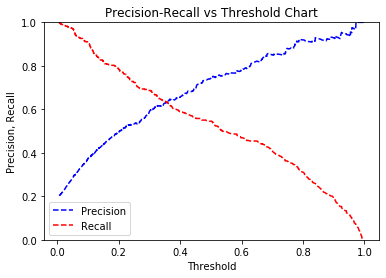

In [343]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 

#### We can conclude from the graph The optimum value of threshold is 0.4

In [344]:
threshold = 0.4
pred = np.where(model.predict_proba(X_test)[:,1] >= threshold, 1, 0)

In [345]:
labels = [1, 0]
con_mat2 = confusion_matrix(y_test, pred, labels = labels )
print(con_mat2)

[[ 238  167]
 [ 125 1470]]


In [346]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1595
           1       0.66      0.59      0.62       405

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



Using Gradient Boosting ,accuracy on training data is 91% and accuracy on testing data is 85.4%

# Conclusion
There are costs associated with the model erroneously assigning false positives and false negatives. It is also important to look at similar costs associated with correct predictions of true positives and true negatives. Because the choice of the threshold affects all four of these statistics,it is important to consider the relative costs to the business for each of these four outcomes for each prediction.